#Dashboard Interativo de Previsão Bikes

##Importação e Instalação de Libs

In [1]:
!pip install evidently
!pip install pyforest

     |████████████████████████████████| 15.2 MB 125 kB/s 
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=7f8c4dd61179c43b39c5c639e57717d6aec6d802715736a6a0af812ae50bef47
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [27]:
from pyforest import *
from sklearn.ensemble import RandomForestRegressor
from evidently.dashboard import Dashboard
from evidently.tabs import RegressionPerformanceTab
from evidently.model_profile import Profile
from evidently.profile_sections import RegressionPerformanceProfileSection

##Importar Base de dados

In [3]:
data= pd.read_csv("/content/drive/MyDrive/Dataset_Excel_CSV/bike-sharing-daily.csv",header = 0, sep = ',', parse_dates=['dteday'])
data.head()

<IPython.core.display.Javascript object>

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


##Separar Variáveis Categóricas

In [5]:
categorical_features = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']

In [31]:
data_features=['dteday']

##Separar Variáveis Numéricas

In [6]:
numerical_features = ['mnth', 'temp', 'hum', 'windspeed','cnt']

Verificar Correlações

<IPython.core.display.Javascript object>

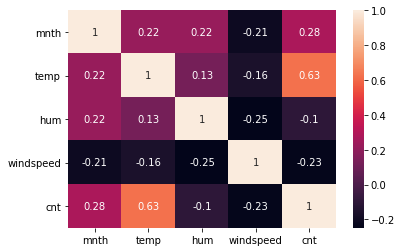

In [7]:
sns.heatmap(data[numerical_features].corr(),annot=True);

##Separar em variáveis preditoras e classe

In [8]:
data_filtrado = data[categorical_features + numerical_features]

In [33]:
data_filtrado_com_data=data[categorical_features + data_features +numerical_features]

In [34]:
X=data_filtrado.iloc[:,0:-1].values
y=data_filtrado.iloc[:,-1:].values

In [35]:
df_X = data_filtrado_com_data.iloc[:,0:-1]
df_y = data_filtrado_com_data.iloc[:,-1:]

##Separar em bases de treinamento e teste

In [36]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3)

<IPython.core.display.Javascript object>

In [37]:
df_X_train, df_X_test, df_y_train,df_y_test = train_test_split(df_X,df_y,test_size=0.3)

<IPython.core.display.Javascript object>

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((511, 9), (220, 9), (511, 1), (220, 1))

##Criar e Treinar Modelo

In [39]:
model = RandomForestRegressor(random_state = 0)

<IPython.core.display.Javascript object>

In [40]:
model.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/pyforest/__init__.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [41]:
df_treinamento=pd.concat([df_X_train,df_y_train],axis=1)
df_treinamento['prediction'] = model.predict(X_train)

<IPython.core.display.Javascript object>

In [42]:
df_test = pd.concat([df_X_test,df_y_test],axis=1)
df_test['prediction'] = model.predict(X_test)

<IPython.core.display.Javascript object>

In [46]:
mapeamento_colunas = {}
mapeamento_colunas['target'] = 'cnt'
mapeamento_colunas['prediction'] = 'prediction'
mapeamento_colunas['datetime'] = 'dteday'
mapeamento_colunas['numerical_features'] = numerical_features
mapeamento_colunas['categorical_features'] = categorical_features
dashboard = Dashboard(tabs=[RegressionPerformanceTab])
dashboard.calculate(df_treinamento,df_test, column_mapping=mapeamento_colunas)
dashboard.save('Demanda Bikes.html')